In [ ]:
from google.colab import files
files.upload()

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


data=pd.read_csv('shootings.csv')
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [4]:
# convert date to datetime attribute
data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True, errors='coerce')

In [5]:
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['monthname'] = data['date'].dt.month_name()
data['weekdayname'] = data['date'].dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [6]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,weekday,month,week,monthname,weekdayname
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,4,1,1,January,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,4,1,1,January,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,5,1,1,January,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,6,1,1,January,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,6,1,1,January,Sunday


In [7]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category', 'year', 'weekday', 'month',
       'week', 'monthname', 'weekdayname'],
      dtype='object')

In [8]:
data = data[['id', 'name', 'date','year', 'weekday', 'month',\
       'week', 'monthname', 'weekdayname','manner_of_death', 'armed', 'age', 'gender',\
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',\
       'flee', 'body_camera', 'arms_category']]

In [9]:
data.head()

,id,name,date,year,weekday,month,week,monthname,weekdayname,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,2015,4,1,1,January,Friday,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,2015,4,1,1,January,Friday,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,2015,5,1,1,January,Saturday,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,2015,6,1,1,January,Sunday,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,2015,6,1,1,January,Sunday,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [10]:
data.info() # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   year                     4895 non-null   int64         
 4   weekday                  4895 non-null   int64         
 5   month                    4895 non-null   int64         
 6   week                     4895 non-null   int64         
 7   monthname                4895 non-null   object        
 8   weekdayname              4895 non-null   object        
 9   manner_of_death          4895 non-null   object        
 10  armed                    4895 non-null   object        
 11  age                      4895 non-null   float64       
 12  gender                   4895 non-

In [11]:
data.shape # shape of the dataframe

(4895, 21)

In [12]:
data.isnull().any() # checking for missing values

id                         False
name                       False
date                       False
year                       False
weekday                    False
month                      False
week                       False
monthname                  False
weekdayname                False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
dtype: bool

## No null entries in the dataframe

In [13]:
data.describe(include='all') # descriptive statistics of the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,id,name,date,year,weekday,month,week,monthname,weekdayname,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895.000000,4895.000000,4895.000000,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,NaN,NaN,NaN,NaN,12,7,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-04-01 00:00:00,NaN,NaN,NaN,NaN,January,Wednesday,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,NaN,NaN,NaN,NaN,505,758,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
first,NaN,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-06-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2902.148519,NaN,NaN,2017.182227,2.949745,6.058631,24.554239,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,1.584525,1.973757,3.461983,15.084528,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,2015.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,2016.000000,1.000000,3.000000,11.000000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **The manner of death from police shooting**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



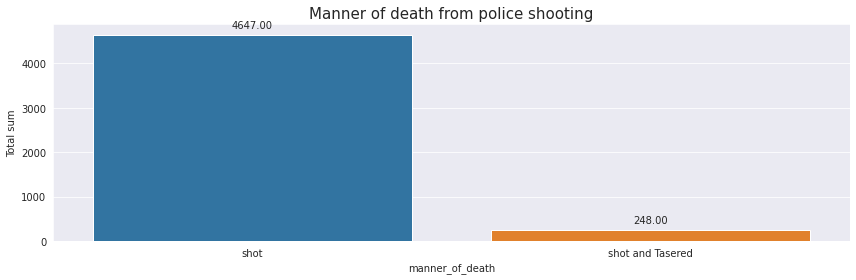

In [14]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(data['manner_of_death'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Manner of death from police shooting', size=15)
plt.tight_layout()

#### Majority of the victims were shot dead, only a few were shot and tasered. The police officers most likely result to shooting at any perceived threat.

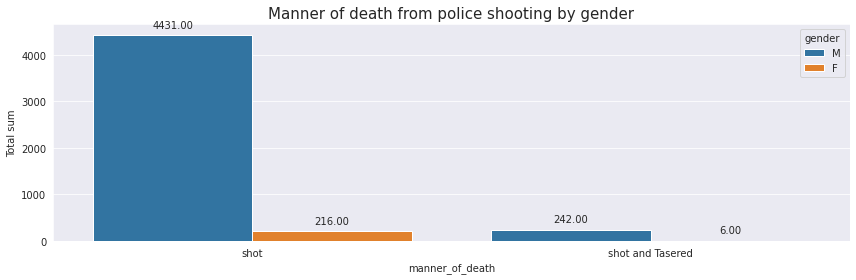

In [15]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='manner_of_death', hue='gender', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Manner of death from police shooting by gender', size=15)
plt.tight_layout()

In [16]:
data.groupby("year").count()['manner_of_death']

year
2015    965
2016    904
2017    906
2018    888
2019    858
2020    374
Name: manner_of_death, dtype: int64

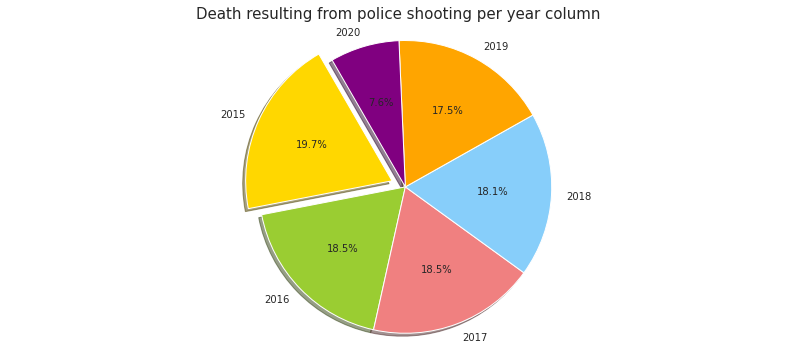

In [17]:
plt.figure(figsize=(14,6))
labels = '2015', '2016','2017','2018','2019', '2020'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'purple']
explode = (0.1, 0, 0, 0, 0, 0)

plt.pie(x=data.groupby("year").count()['manner_of_death'], labels=labels, colors=colors, 
        explode=explode, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title('Death resulting from police shooting per year column', size=15)
plt.show()

The death rate was fairly constant from 2015 - 2019






# **Death by Gender**

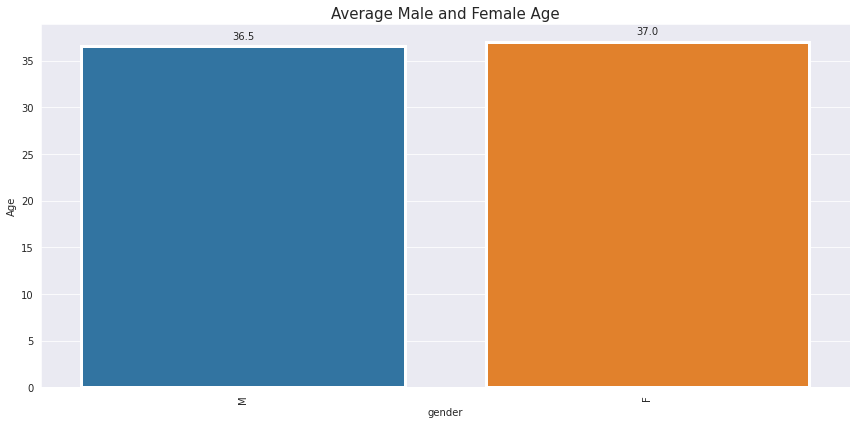

In [27]:
plt.figure(figsize=(12, 6))
splot = sns.barplot(x='gender', y='age', linewidth=3, ci=None, data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Age')
plt.title('Average Male and Female Age', size=15)
plt.xticks(rotation=90)
plt.tight_layout()

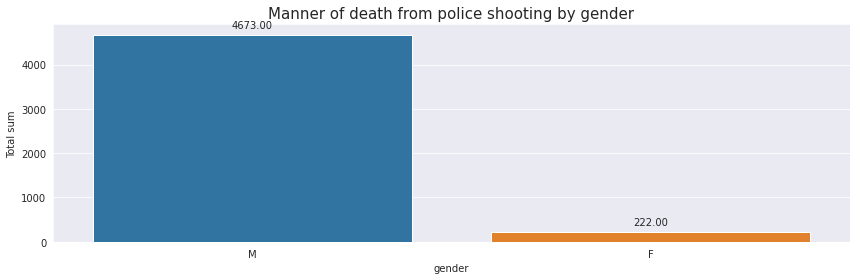

In [28]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='gender', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Manner of death from police shooting by gender', size=15)
plt.tight_layout()

#### Majority of the people killed were males. 
This means the male gender commits more crime than the female gender and also the police will most likely result to shooting with the male gender.

##      

#**Police Shooting by Flee**

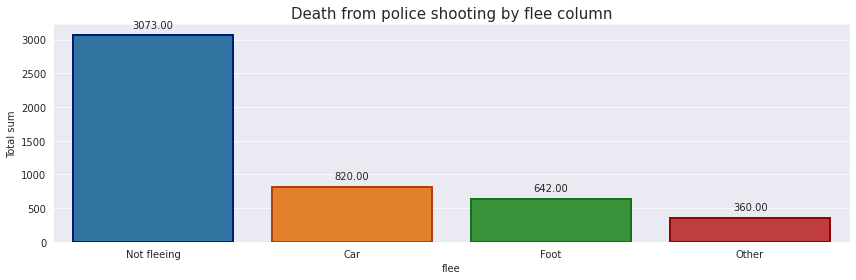

In [29]:
plt.figure(figsize=(12, 4))
splot = sns.countplot(x='flee', linewidth=2, edgecolor=sns.color_palette("dark", 9), data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Death from police shooting by flee column', size=15)
plt.tight_layout()

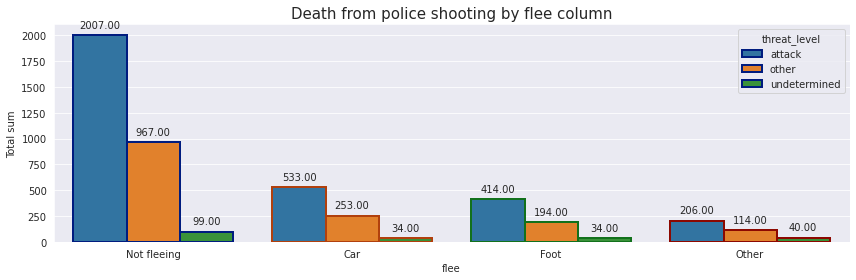

In [30]:
plt.figure(figsize=(12, 4))
splot = sns.countplot(x='flee', hue='threat_level', linewidth=2, edgecolor=sns.color_palette("dark", 9), data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Death from police shooting by flee column', size=15)
plt.tight_layout()

### A substantial amount of the people killed didn't flee the scene and were involved in an attack. 
This explains the high death rate in that category.

#**Mental** **Illness**

In [31]:
data.groupby("signs_of_mental_illness").count()['manner_of_death']

signs_of_mental_illness
False    3792
True     1103
Name: manner_of_death, dtype: int64

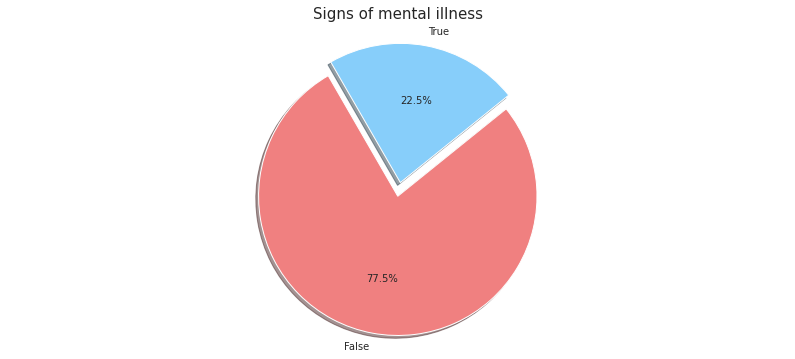

In [32]:
plt.figure(figsize=(14,6))
labels = 'False','True'
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(x=data.groupby("signs_of_mental_illness").count()['manner_of_death'], labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title('Signs of mental illness', size=15)
plt.show()

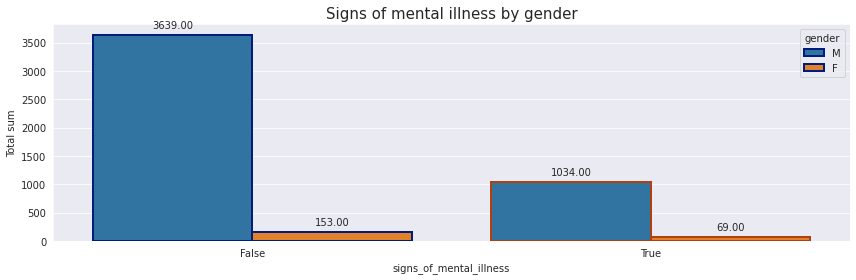

In [33]:
plt.figure(figsize=(12, 4))
splot = sns.countplot(x='signs_of_mental_illness', hue='gender', linewidth=2, edgecolor=sns.color_palette("dark", 9), data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Signs of mental illness by gender', size=15)
plt.tight_layout()

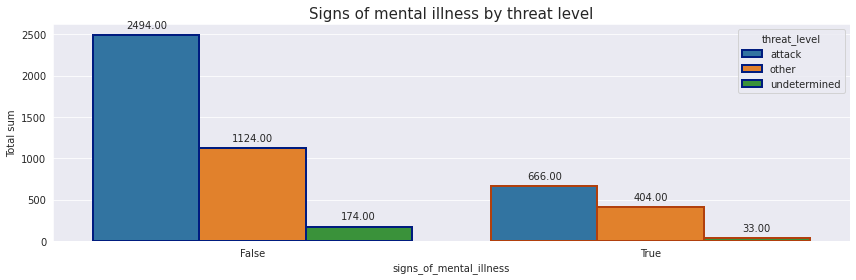

In [34]:
plt.figure(figsize=(12, 4))
splot = sns.countplot(x='signs_of_mental_illness', hue='threat_level', linewidth=2, edgecolor=sns.color_palette("dark", 9), data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Signs of mental illness by threat level', size=15)
plt.tight_layout()

Majority of the people killed were not suffering from any mental illness and they were in their right state of mind when commiting the crime.

# **Death Age distribution, Average Yearly and Monthly Death Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



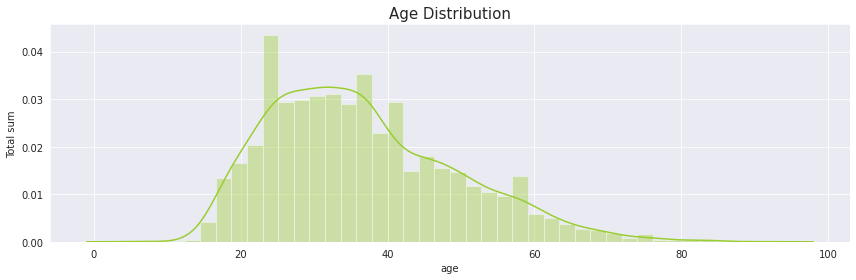

In [35]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
sns.distplot(data['age'], bins=40, color='yellowgreen')
plt.ylabel('Total sum')
plt.title('Age Distribution', size=15)
plt.tight_layout()

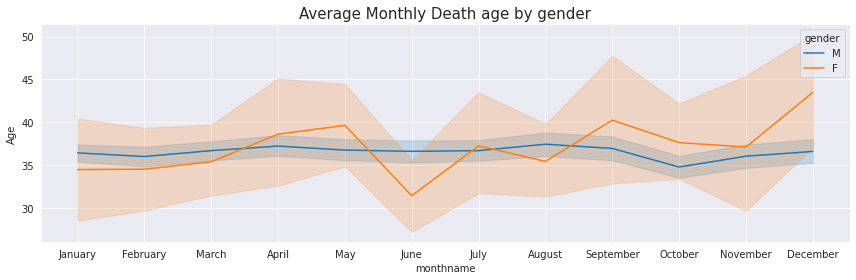

In [36]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
sns.lineplot(x='monthname',y='age',hue='gender', data=data)
plt.ylabel('Age')
plt.title('Average Monthly Death age by gender', size=15)
plt.tight_layout()

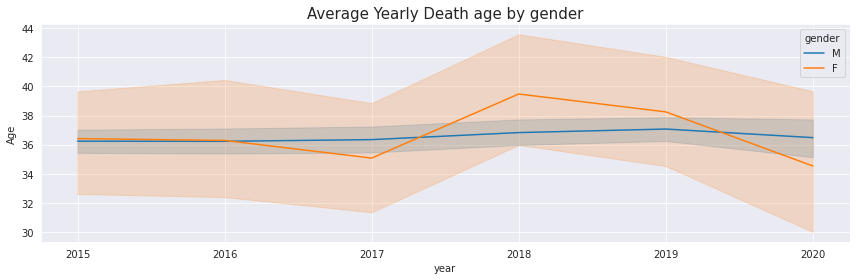

In [37]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
sns.lineplot(x='year',y='age',hue='gender', data=data)
plt.ylabel('Age')
plt.title('Average Yearly Death age by gender', size=15)
plt.tight_layout()

The average death age, monthly and yearly, for the male was fairly constant and it ranged from 35 to about 38 years while that of the female wasn't.
A crime is likely to be commited by a male from this age bracket (35-38)

# **Arms**

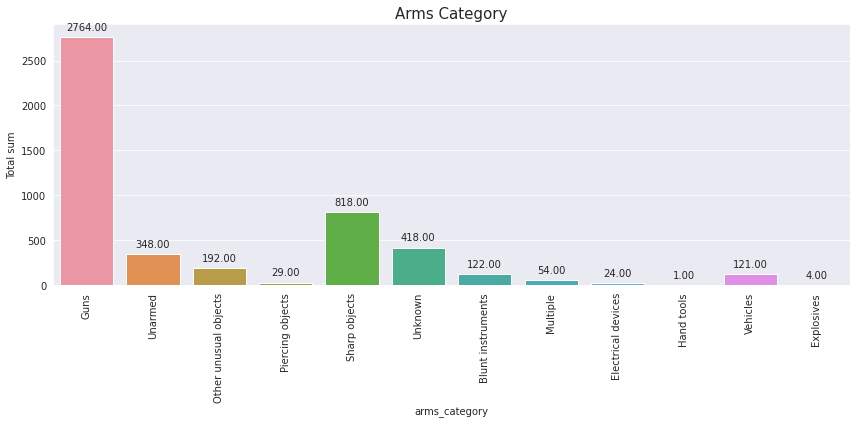

In [38]:
plt.figure(figsize=(12, 6))
splot = sns.countplot(x='arms_category', linewidth=1, data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Arms Category', size=15)
plt.xticks(rotation=90)
plt.tight_layout()

In [39]:
data.groupby("armed").count()["manner_of_death"].sort_values(ascending=False).head(10)

armed
gun           2755
knife          708
unknown        418
unarmed        348
toy weapon     171
vehicle        120
machete         39
Taser           24
sword           22
ax              21
Name: manner_of_death, dtype: int64

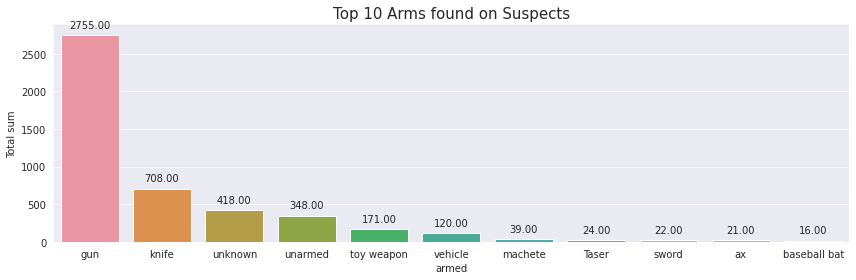

In [40]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='armed', order=data.armed.value_counts().iloc[:11].index, data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Top 10 Arms found on Suspects', size=15)
plt.tight_layout()

A substantial amount of the arms found on the suspects are guns.

# **City**

In [41]:
data.city.value_counts()

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
                ..
Mount Vernon     1
Bloomingdale     1
Livermore        1
Newport          1
Grenada          1
Name: city, Length: 2288, dtype: int64

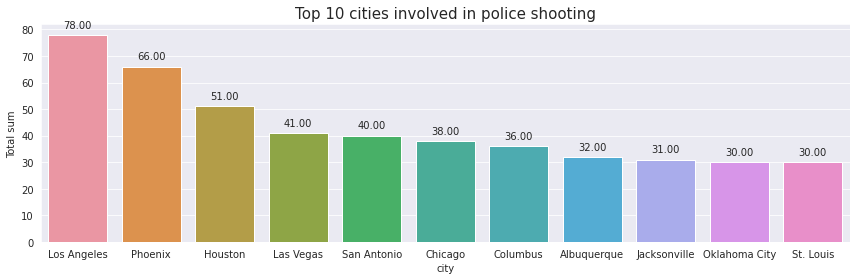

In [42]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='city', order=data.city.value_counts().iloc[:11].index, data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Top 10 cities involved in police shooting', size=15)
plt.tight_layout()

# **Race**

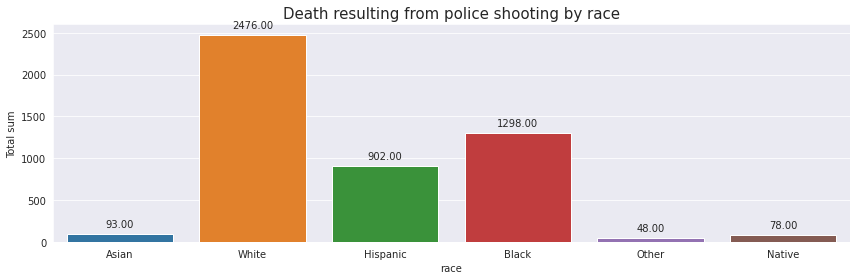

In [43]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='race', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Death resulting from police shooting by race', size=15)
plt.tight_layout()

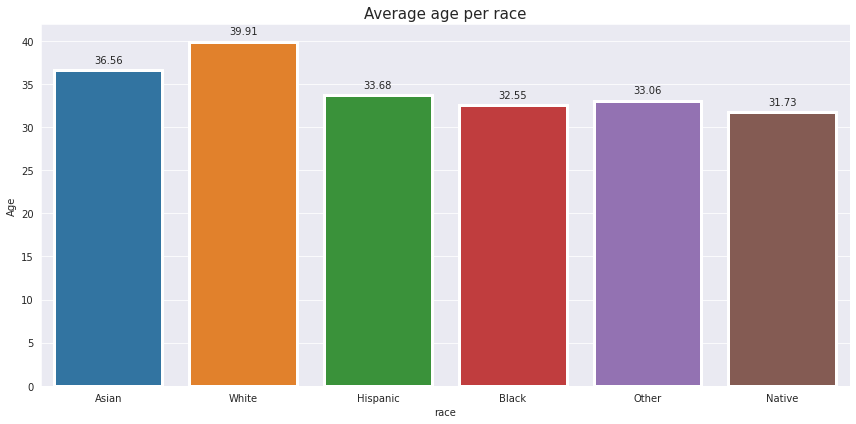

In [44]:
plt.figure(figsize=(12, 6))
splot = sns.barplot(x='race', y='age', linewidth=3, ci=None, data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Age')
plt.title('Average age per race', size=15)
plt.tight_layout()

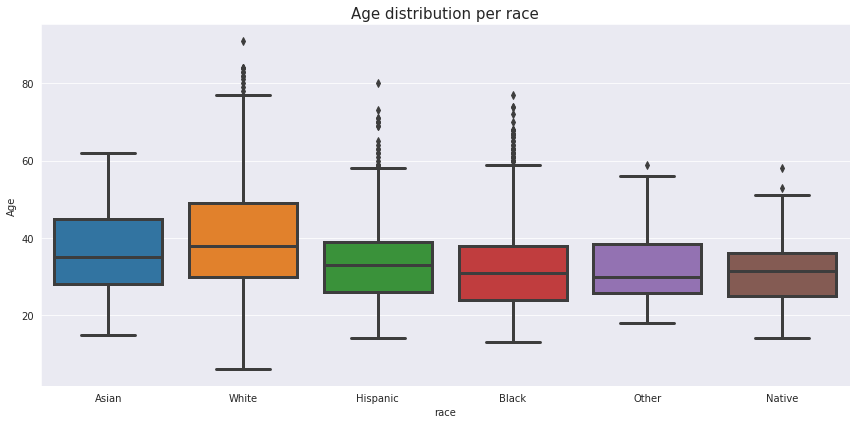

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='age', linewidth=3, data=data)
plt.ylabel('Age')
plt.title('Age distribution per race', size=15)
plt.tight_layout()

Majority of the whites were killed compared to the other races.
Futhermore, blacks are killed at a higer rate giving that the blacks are less populated compared to the whites in the cities at which this data was collected and the difference in the deaths between the blacks and the whites is not as significant as the population difference in the region whic the data was collected.

# **Threat level**

In [48]:
data.groupby("threat_level").count()['manner_of_death']

threat_level
attack          3160
other           1528
undetermined     207
Name: manner_of_death, dtype: int64

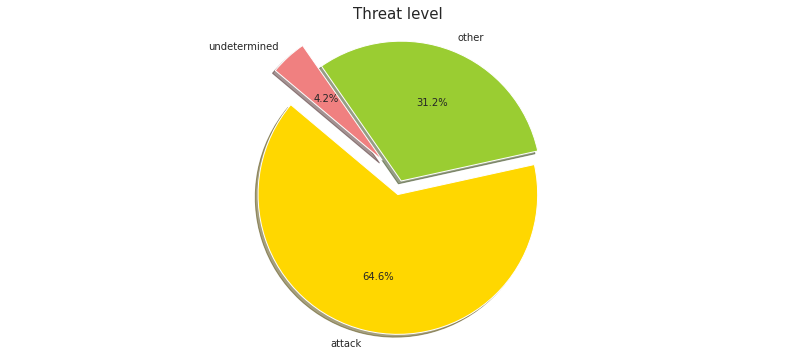

In [49]:
plt.figure(figsize=(14,6))
labels = 'attack', 'other','undetermined'
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0.2)

plt.pie(x=data.groupby("threat_level").count()['manner_of_death'], labels=labels, colors=colors, 
        explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Threat level', size=15)
plt.show()

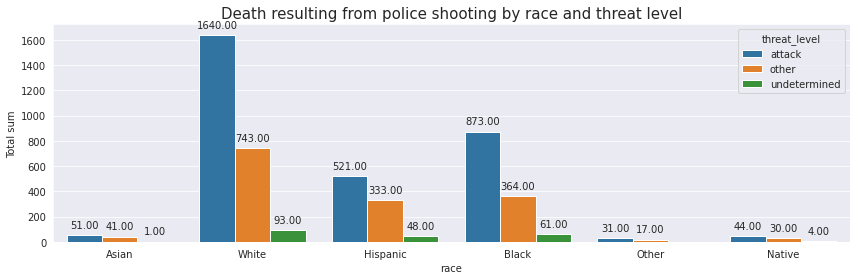

In [50]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='race', hue='threat_level', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Death resulting from police shooting by race and threat level', size=15)
plt.tight_layout()

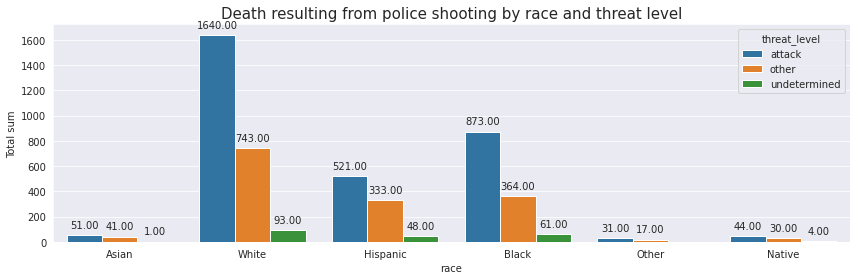

In [51]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='race', hue='threat_level', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Death resulting from police shooting by race and threat level', size=15)
plt.tight_layout()

# **Body Camera** 

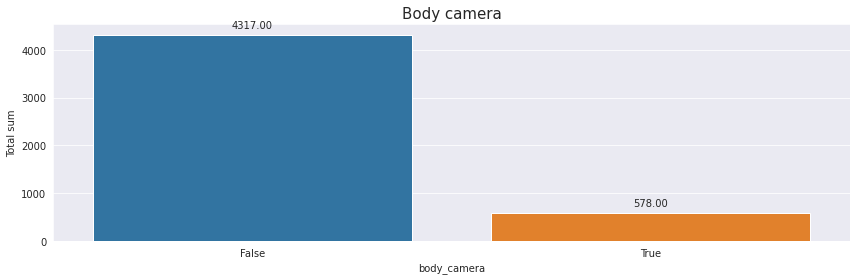

In [52]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='body_camera', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Body camera', size=15)
plt.tight_layout()

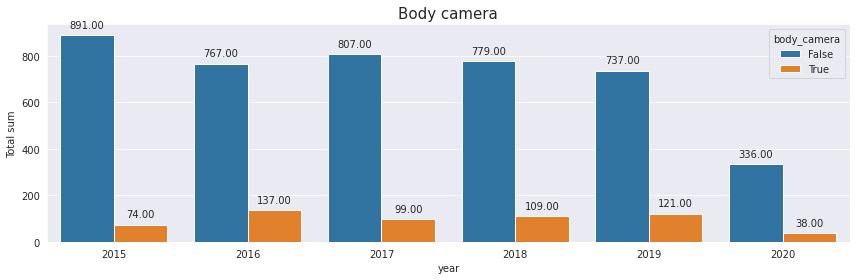

In [53]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='year', hue='body_camera', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Body camera', size=15)
plt.tight_layout()

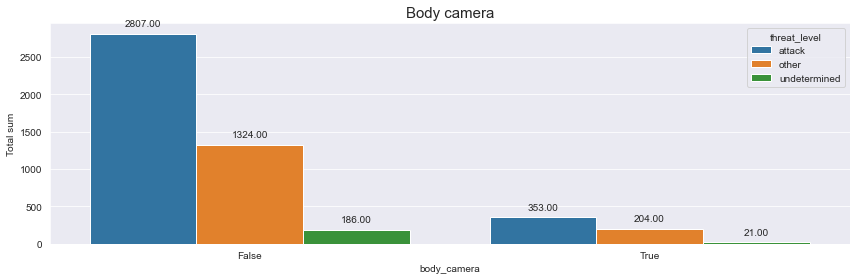

In [ ]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='body_camera', hue='threat_level', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Total sum')
plt.title('Body camera', size=15)
plt.tight_layout()